# ML intro based on Kaggle Competition & Andrew Conti github
* Competition [homepage](http://www.kaggle.com/c/titanic-gettingStarted).
* Adrew Conti's [github](https://github.com/agconti/kaggle-titanic)

## Based on Kaggle Competition | Titanic Machine Learning from Disaster 

>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.  This sensational tragedy shocked the international community and led to better safety regulations for ships.

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.  Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

>In this contest, we ask you to complete the analysis of what sorts of people were likely to survive.  In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

>This Kaggle Getting Started Competition provides an ideal starting place for people who may not have a lot of experience in data science and machine learning."

From the competition [homepage](http://www.kaggle.com/c/titanic-gettingStarted).


## Goal for this Notebook:
Show a simple example for basic ML pipeline analysis of the Titanic disaster in Python.

### This Notebook will show basic examples of: 
#### Feature engineering
*   Importing Data with Pandas
*   Cleaning Data
*   Exploring Data through Visualizations with Matplotlib
*    Supervised Machine learning Techniques:
    +   basic decision tree
    +   Plotting results

#### Valuation of the Analysis
*   TBD



### Required Libraries:
* [NumPy](http://www.numpy.org/)
* [IPython](http://ipython.org/)
* [Pandas](http://pandas.pydata.org/)
* [SciKit-Learn](http://scikit-learn.org/stable/)
* [SciPy](http://www.scipy.org/)
* [StatsModels](http://statsmodels.sourceforge.net/)
* [Patsy](http://patsy.readthedocs.org/en/latest/)
* [Matplotlib](http://matplotlib.org/)

***To run this notebook interactively, get it from my Github [here](https://github.com/agconti/kaggle-titanic). The competition's website is located on [Kaggle.com](http://www.kaggle.com/c/titanic-gettingStarted).***

### Import libs

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm

### (1) Load data
#### Data is split into train and test series. Let's read train data using pandas:

In [2]:
df = pd.read_csv("data/train.csv") 

Show an overview of our data:

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Let's take a look:

A data dictionary https://www.kaggle.com/c/titanic/data 

Above is a summary of our data contained in a `Pandas` `DataFrame`. Think of a `DataFrame` as a Python's super charged version of the workflow in an Excel table. As you can see the summary holds quite a bit of information. First, it lets us know we have 891 observations, or passengers, to analyze here:
    
    Int64Index: 891 entries, 0 to 890

Next it shows us all of the columns in `DataFrame`. Each column tells us something about each of our observations, like their `name`, `sex` or `age`. These colunms  are called a features of our dataset. You can think of the meaning of the words column and feature as interchangeable for this notebook. 

After each feature it lets us know how many values it contains. While most of our features have complete data on every observation, like the `survived` feature here: 

    survived    891  non-null values 

some are missing information, like the `age` feature: 

    age         714  non-null values 

These missing values are represented as `NaN`s.


In [4]:
df.shape

(891, 12)

In [5]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
df['Age'].isnull().sum()

177

### (2) Data scrubing: Take care of nan values /  missing data
The features `ticket` and `cabin` have many missing values and so can’t add much value to our analysis. To handle this we will drop them from the dataframe to preserve the integrity of our dataset.

To do that we'll use this line of code to drop the features entirely:

    df = df.drop(['ticket','cabin'], axis=1) 


While this line of code removes the `NaN` values from every remaining column / feature:
   
    df = df.dropna()
     
Now we have a clean and tidy dataset that is ready for analysis. Because `.dropna()` removes an observation from our data even if it only has 1 `NaN` in one of the features, it would have removed most of our dataset if we had not dropped the `ticket` and `cabin`  features first.


In [9]:
df = df.drop(['Ticket','Cabin'], axis=1)
# Remove NaN values
df = df.dropna() 

For a detailed look at how to use pandas for data analysis, the best resource is Wes Mckinney's [book](http://shop.oreilly.com/product/0636920023784.do). Additional interactive tutorials that cover all of the basics can be found [here](https://bitbucket.org/hrojas/learn-pandas) (they're free).

### (3) Data visualization
* **[Matplotlib](https://matplotlib.org/): [tutorial](https://matplotlib.org/users/pyplot_tutorial.html) [Effectively Using Matplotlib](http://pbpython.com/effective-matplotlib.html)**
* [Seaborn](https://seaborn.pydata.org/)
* [Plotly](https://plot.ly/python/)
* [Bokeh](https://bokeh.pydata.org/en/latest/): [tutorial](https://bokeh.pydata.org/en/latest/docs/user_guide/quickstart.html)

### Example: Fare rate vs Survival

#### Fare vs survival

<IPython.core.display.Javascript object>


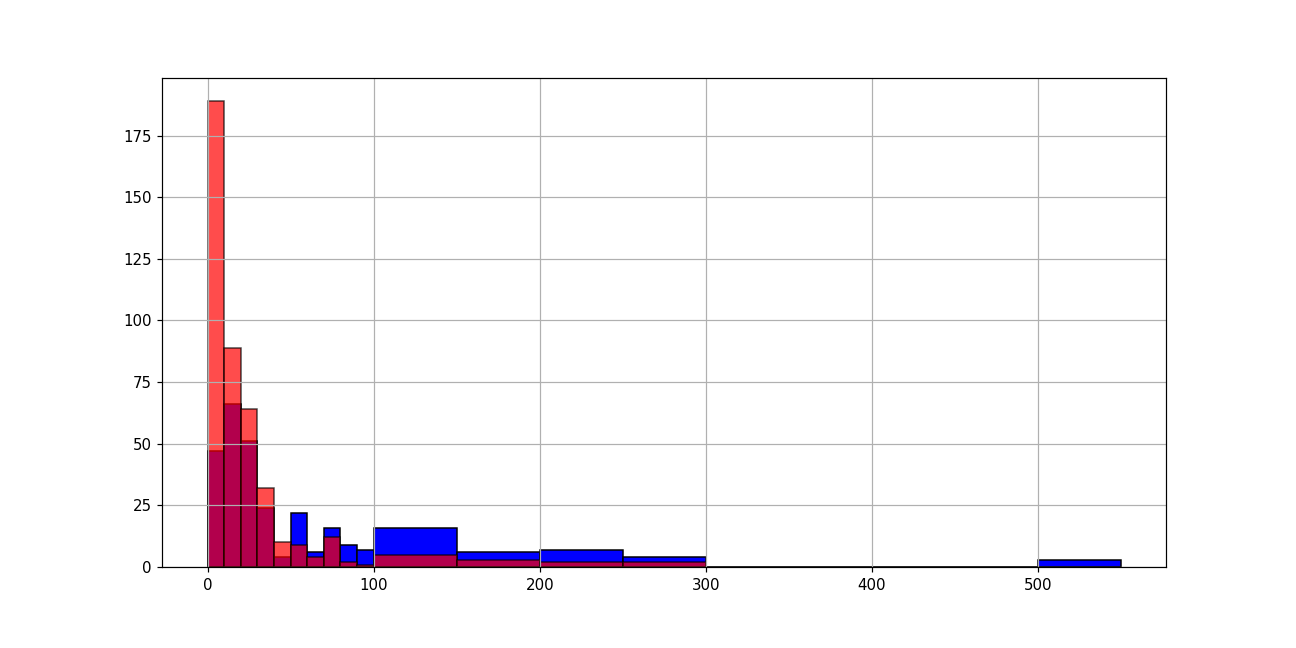

In [12]:
# for interactive plot use %matplotlib notebook
# for non interactive plot use %matplotlib inline
%matplotlib notebook
fig = plt.figure(figsize=(12,6))
bins = list(range(0,100,10))+list(range(100,600,50))
df[df.Survived == 1]['Fare'].hist(bins=bins, color='b', normed=False, edgecolor='black')
df[df.Survived == 0]['Fare'].hist(bins=bins, color='r', normed=False, edgecolor='black', alpha=0.7)
plt.show()

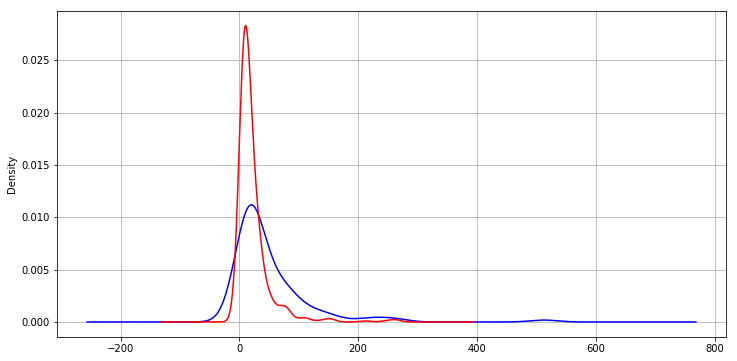

In [13]:
# negative example: density plot hiding information.
%matplotlib inline
fig = plt.figure(figsize=(12,6))
df.Fare[df.Survived == 1].plot(kind='kde', color='b') 
df.Fare[df.Survived == 0].plot(kind='kde', color='r') 
plt.grid(True)

### Fare @ age vs survival

In [ ]:
%matplotlib notebook
fig = plt.figure(figsize=(12,6))
plt.plot(df[df.Survived == 0]['Fare'], df[df.Survived == 0]['Age'], 'ob', linewidth=4)
plt.plot(df[df.Survived == 1]['Fare'], df[df.Survived == 1]['Age'], 'xr', linewidth=4)
plt.xlabel('Fare')
plt.ylabel('Age')
plt.grid(True)

# Challenge
Find the "best" classifier that will help us to predict whether a passenger survived or not, without using ML libs.
* Visualize feature.
* Write a classifier / decision rule based on feature ().
* Check performance on train set ```df = pd.read_csv("data/train.csv")```.
* Check performance on test set ```df = pd.read_csv("data/test.csv")```.

/home/edys/miniconda3/envs/ml_intro/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


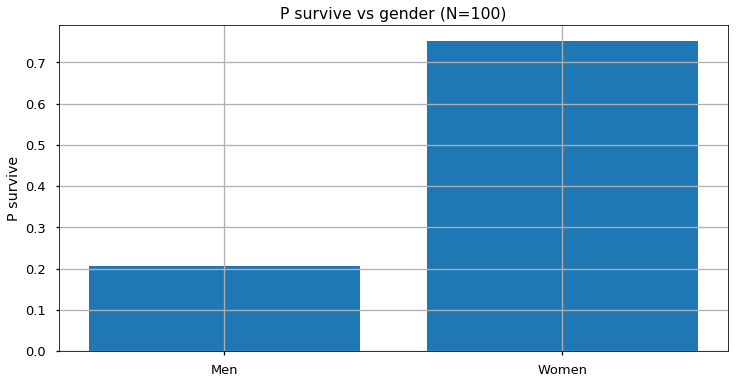

In [19]:
# P male / femalke survived


p_fem_sur = df[(df.Sex == 'female')&(df.Survived == 1)].shape[0] / df[df.Sex == 'female'].shape[0]
p_mal_sur = df[(df.Sex == 'male')&(df.Survived == 1)].shape[0] / df[df.Sex == 'male'].shape[0]

plt.style.available
plt.style.use('seaborn-talk')

# %matplotlib notebook
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,6))
ax.bar([0, 1], [p_mal_sur, p_fem_sur], )
ax.set_xticks([0, 1])
ax.set_xticklabels(('Men', 'Women'))
ax.set_ylabel('P survive')
ax.set_title('P survive vs gender (N=100)')
ax.grid(True)
fig.show()

# sample predictor

In [ ]:
def my_predict(df):
    pred = pd.DataFrame(index = )